# ANÁLISE DOS EFEITOS DA PANDEMIA POR REGIÕES DO BRASIL

In [ ]:
#CARREGANDO OS PACOTES 

pgks <- c ('factoextra', 'tidyverse', 'gridExtra','writexl','ggpubr','RColorBrewer')

install.packages(pgks)

library('tidyverse')
library('readr')
library('data.table')
library('readxl')
library('dplyr')
library('factoextra')
library('gridExtra')
library('reshape2')
library('writexl')
library('ggpubr')
library('RColorBrewer')

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘plyr’, ‘Rcpp’, ‘corrplot’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘reshape2’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [ ]:
install.packages ('ggsci')
library('ggsci')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 1 TRATAMENTO DOS DADOS

In [ ]:
# 1.1Carregando os bancos de dados

df_2016 <- read_csv('df_2016.csv')
df_2017 <- read_csv('df_2017.csv')
df_2018 <- read_csv('df_2018.csv')
df_2019 <- read_csv('df_2019.csv')
df_2020 <- read_csv('df_2020.csv')
df_2021 <- read_csv('df_2021.csv')

#1.2 REORGANIZANDOS OS DADOS. 

# Nesse ano houveram duas categorias diferentes no tipo de escola que foram,
# não responderam(1) e escola internactional (4)  
df_2017 <- filter(df_2017, TP_ESCOLA != '1' & TP_ESCOLA != '4' )


# Nesse ano houveram duas categorias diferentes no tipo de escola que foram,
# não responderam(1) e escola international (3)
df_2018 <-  df_2018 %>% filter(TP_ESCOLA != '1' & TP_ESCOLA != '3') 

Rows: 1046095 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): TP_SEXO, SG_UF_ESC, Q001, Q002, Q006, Q022, Q024, Q025
dbl (20): TP_FAIXA_ETARIA, TP_COR_RACA, TP_ST_CONCLUSAO, TP_ESCOLA, IN_TREIN...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1072497 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): TP_SEXO, SG_UF_ESC, Q001, Q002, Q006, Q022, Q024, Q025
dbl (20): TP_FAIXA_ETARIA, TP_COR_RACA, TP_ST_CONCLUSAO, TP_ESCOLA, IN_TREIN...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1084708 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): TP_SEXO, SG_UF_ESC, Q001

In [ ]:
# 1.3 CRIANDO UMA VARIAVEL PARA IDENTIFICA CADA ANO DO EXAME                 
df_2016_2 <- df_2016 %>%mutate(ano_do_exame = 2016)
df_2017_2 <- df_2017 %>%mutate(ano_do_exame = 2017)
df_2018_2 <- df_2018 %>%mutate(ano_do_exame = 2018)
df_2019_2 <- df_2019 %>%mutate(ano_do_exame = 2019)
df_2020_2 <- df_2020 %>%mutate(ano_do_exame = 2020)
df_2021_2 <- df_2021 %>%mutate(ano_do_exame = 2021)


# 1.4 JUNTANDO O BANCO DE DADOS 
df_geral <- rbind(df_2016_2,df_2017_2,df_2018_2,df_2019_2,df_2020_2,df_2021_2)

df_geral$ano_do_exame <- as.factor(df_geral$ano_do_exame)

#1.5 Retirando os outliers 
df_geral <- filter(df_geral, NU_NOTA_CH != 0 , NU_NOTA_CN != 0, NU_NOTA_LC != 0, NU_NOTA_MT != 0 )

# REORGANIZANDO AS CATEGORIAS DA VARIÁVEL ESCOLA
df_geral$TP_ESCOLA <- df_geral$TP_ESCOLA%>% as.factor()%>% recode_factor('4'= '3')

In [ ]:

# 1.6 RECODIFICANDO AS VARIAVEL RENDA 
df_geral <-mutate(df_geral, classes_renda = recode(df_geral$Q006, 'A'= 'CLASSE_E','B' = 'CLASSE_E', 'C' = 'CLASSE_E', 
                  'D' = 'CLASSE_E', 'E' = 'CLASSE_D', 'F' = 'CLASSE_D', 'G' = 'CLASSE_D','H' ='CLASSE_C','I'='CLASSE_C',
                  'J'= 'CLASSE_C', 'K'='CLASSE_C', 'L' ='CLASSE_C','M'='CLASSE_C', 'N' = 'CLASSE_B','O'= 'CLASSE_B', 
                  'P'='CLASSE_B','Q' = 'CLASSE_A'))

#1.7 CRIANDO A VARIÁVEL REGIÕES DO NORDESTE
df_geral <- mutate(df_geral,regioes = recode(df_geral$SG_UF_ESC ,'RO'= 'NORTE','AC'='NORTE','AM'= 'NORTE',
'RR'= 'NORTE','PA'= 'NORTE','AP'= 'NORTE','TO' = 'NORTE','MA' = 'NORDESTE', 'PI'= 'NORDESTE','CE'='NORDESTE',
'RN' ='NORDESTE','PB'='NORDESTE','PE'='NORDESTE', 'AL'='NORDESTE','SE'='NORDESTE','BA'='NORDESTE','MG'= 'SUDESTE',
'ES'='SUDESTE','RJ'='SUDESTE', 'SP'='SUDESTE','PR'= 'SUL','SC'= 'SUL','RS'= 'SUL','MS'='CENTRO-OESTE','MT'='CENTRO-OESTE',
'GO'='CENTRO-OESTE','DF'='CENTRO-OESTE'))

#CRIANDO A VARIAVE MEDIA DAS NOAS 
media <- data.frame(rowMeans(select(df_geral, NU_NOTA_CH, NU_NOTA_CN,
NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO)))

media<- rename(media, 'MEDIA' = 'rowMeans.select.df_geral..NU_NOTA_CH..NU_NOTA_CN..NU_NOTA_LC..') 

df_geral <- cbind(df_geral, media)


## 2 MÉDIA GERAL DO ENEM POR REGIÕES DO BRASIL

In [ ]:
# 2.1 ORGANIZAÇÃO DE UM BANCO DE DADOS PARA PLOTAGEM DOS GRÁFICOS

df_geral %>% select(NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,
NU_NOTA_REDACAO,ano_do_exame, regioes)-> df_regiao 

df_regiao %>% group_by(ano_do_exame,regioes) %>%
summarise(
media_CH = mean(NU_NOTA_CH),
media_CN = mean(NU_NOTA_CN),
media_LC = mean(NU_NOTA_LC),
media_MT = mean(NU_NOTA_MT),
media_redacao = mean(NU_NOTA_REDACAO),
media_geral = (media_CH+ media_CN+ media_LC+ media_MT+ media_redacao)/5) -> df_medias_regiao

      

`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


In [ ]:
write_xlsx(df_medias_regiao,"medias_enem_regiao.xlsx")

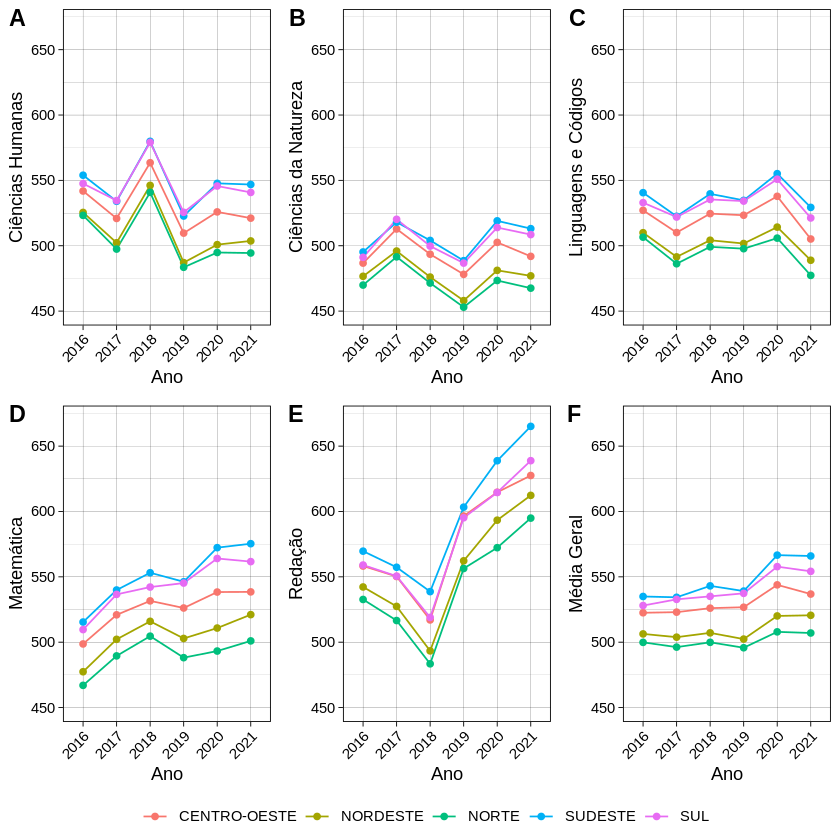

In [ ]:
# PLOTAGEM DOS DAS MÉDIAS POR REGIÕES DO BRASIL

#Ciências Humanas
df_medias_regiao %>%
ggplot(aes(x= ano_do_exame , y = media_CH ,group = regioes, color = regioes))+
geom_line()+
geom_point() +
ylim(c(450,670))+
labs(y = 'Ciências Humanas', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank()) -> MD_CH

#Ciências da Natureza
df_medias_regiao %>%
ggplot(aes(x= ano_do_exame , y = media_CN ,group = regioes, color = regioes))+
geom_line()+
geom_point() +
ylim(c(450,670))+
labs(y = 'Ciências da Natureza', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> MD_CN

#Linguagens e Códigos
df_medias_regiao %>%
ggplot(aes(x= ano_do_exame , y = media_LC ,group = regioes, color = regioes))+
geom_line()+
geom_point() +
ylim(c(450,670))+
labs( y = 'Linguagens e Códigos', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> MD_LC

#Matemática
df_medias_regiao %>%
ggplot(aes(x= ano_do_exame , y = media_MT ,group = regioes, color = regioes))+
geom_line()+
geom_point() +
ylim(c(450,670))+
labs(y = 'Matemática', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> MD_MT

#Redação
df_medias_regiao %>%
ggplot(aes(x= ano_do_exame , y = media_redacao ,group = regioes, color = regioes))+
geom_line()+
geom_point() +
ylim(c(450,670))+
labs(y = 'Redação', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> MD_REDACAO

#Media geral
df_medias_regiao %>%
ggplot(aes(x= ano_do_exame , y = media_geral ,group = regioes, color = regioes))+
geom_line()+
geom_point() +
ylim(c(450,670))+
labs(y = 'Média Geral', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> MD_GERAL

ggarrange(MD_CH, MD_CN, MD_LC, MD_MT, MD_REDACAO, MD_GERAL,
labels = c("A", "B", "C",'D','E','F'), ncol = 3 , nrow = 2,common.legend = TRUE, legend = "bottom")


### 2.1 GRÁFICO DE BOX PLOT

In [ ]:
#PLOTANDO O GRÁFICOS DE BOX PLOT

install.packages('ggsci')
library('ggsci')

#CIÊNCIAS HUMANAS
ggplot(df_geral, (aes(x = ano_do_exame, y = NU_NOTA_CH, color = ano_do_exame)))+
geom_boxplot(show.legend = FALSE)+
ylim(0,1000)+
labs( y = 'Notas em CH', x = 'Ano') +
theme_linedraw()+
scale_x_discrete(guide = guide_axis(angle = 45))+
scale_color_jco() -> box_CH

#CIÊNCIAS DA NATUREZA
ggplot(df_geral, (aes(x = ano_do_exame, y = NU_NOTA_CN, color = ano_do_exame)))+
geom_boxplot(show.legend = FALSE)+
ylim(0,1000)+
labs( y = 'Notas em CN', x = 'Ano') +
theme_linedraw()+
scale_color_jco() -> box_CN


#LINGUAGENS E CODIGOS
ggplot(df_geral, (aes(x = ano_do_exame, y = NU_NOTA_LC, color = ano_do_exame)))+
geom_boxplot(show.legend = FALSE)+
ylim(0,1000)+
labs( y = 'Notas em LC',x = 'Ano') +
theme_linedraw()+
scale_x_discrete(guide = guide_axis(angle = 45))+
scale_color_jco()-> box_LC

#MATEMATICA
ggplot(df_geral, (aes(x = ano_do_exame, y = NU_NOTA_MT, color = ano_do_exame)))+
geom_boxplot(show.legend = FALSE)+
ylim(0,1000)+
labs( y = 'Notas em MT',x = 'Ano') +
theme_linedraw()+
scale_x_discrete(guide = guide_axis(angle = 45))+
scale_color_jco()-> box_MT

#REDAÇÃO
ggplot(df_geral, (aes(x = ano_do_exame, y = NU_NOTA_REDACAO, color = ano_do_exame)))+
geom_boxplot(show.legend = FALSE)+
ylim(0,1000)+
labs( y = 'Notas em Redação',x = 'Ano') +
theme_linedraw()+
scale_x_discrete(guide = guide_axis(angle = 45))+
scale_color_jco() ->box_REDACAO

# MEDIA 
ggplot(df_geral, (aes(x = ano_do_exame, y = MEDIA, color = ano_do_exame)))+
geom_boxplot(show.legend = FALSE)+
ylim(0,1000)+
labs( y = 'Média Geral',x = 'Ano') +
theme_linedraw()+
scale_x_discrete(guide = guide_axis(angle = 45))+
scale_color_jco() -> box_MEDIA


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



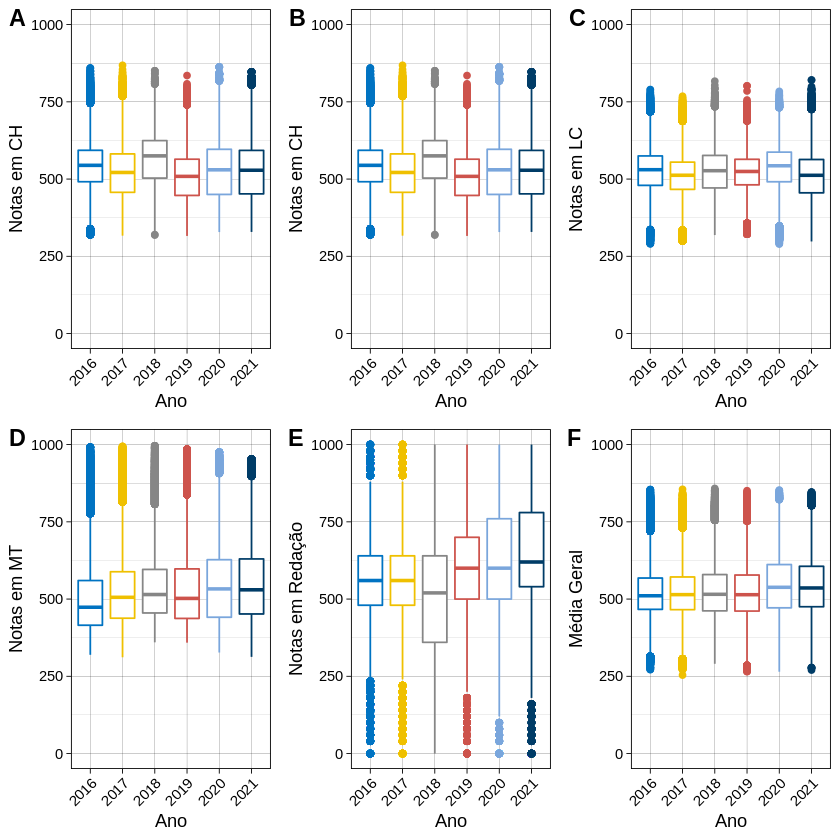

In [ ]:
ggarrange(box_CH,box_CH,box_LC,box_MT,box_REDACAO,box_MEDIA,
labels = c("A", "B", "C",'D','E','F'), ncol = 3 , nrow = 2)

## 3 FREQUÊNCIAS DAS CATEGORIAS POR ANO

In [ ]:
#3.1 ORGANIZAÇÃO DO BANCO DE DADOS PARA CONTAGEM DAS CATEGORIAS

 df_freq <- df_geral %>% 
 group_by (ano_do_exame)%>%
 summarise(n = n(), 
 count_esc_pub = table(TP_ESCOLA)['2'],
 count_esc_pri = table(TP_ESCOLA)['3'],
 Pública = round((count_esc_pub/n)*100,2),
 Privada = round((count_esc_pri/n)*100,2),
 count_sem_net = table(Q025)['A'],
 count_com_net =table(Q025)['B'],
 Não = round((count_sem_net/n)*100,2),
 Sim = round((count_com_net/n)*100,2),
 count_classe_E = table(classes_renda)['CLASSE_E'],
 count_classe_D = table(classes_renda)['CLASSE_D'],
 count_classe_C = table(classes_renda)['CLASSE_C'],
 count_classe_B = table(classes_renda)['CLASSE_B'],
 count_classe_A = table(classes_renda)['CLASSE_A'],
 count_nordeste = table(regioes)['NORDESTE'],
 count_norte    = table(regioes)['NORTE'],
 count_sudeste = table(regioes)['SUDESTE'],
 count_sul      = table(regioes)['SUL'],
 count_centro   = table(regioes)['CENTRO-OESTE'],
 Classe_E  = round((count_classe_E/ n)*100,2),
 Classe_D  = round((count_classe_D/ n)*100,2),
 Classe_C  = round((count_classe_C/ n)*100,2),
 Classe_B  = round((count_classe_B/ n)*100,2),
 Classe_A  = round((count_classe_A/ n)*100,2),
 Nordeste  = round((count_nordeste/n)*100,2),
 Norte     = round((count_norte/n)*100,2),
 Sudeste  = round((count_sudeste/n)*100,2),
 Sul       = round((count_sul/n)*100,2),
 Centro    = round((count_centro/n)*100,2))
 

In [ ]:
#3.2 PLOTAGEM DOS GRÁFICOS POR CATEGORIAS

#TIPO DE ESCOLA

freq_escola <- select(df_freq, ano_do_exame, Pública, Privada ) %>%
melt(id = 'ano_do_exame')

freq_escola %>% ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Frequência por tipo de escola')+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), legend.position="bottom",
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title =element_blank(), legend.text = element_text(size = 6),legend.key.size = unit(0.2,'cm'))+
labs( x = 'Ano', y = 'Frequência (%)') -> freq_escola_1 


#TIPO DE RENDA
freq_renda <- select(df_freq, ano_do_exame, Classe_A, Classe_B,Classe_C,Classe_D,Classe_E ) %>%
melt(id = 'ano_do_exame')

freq_renda %>% ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Frequência por tipo de renda')+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10),legend.position="bottom",
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title =element_blank(), legend.text = element_text(size = 6),legend.key.size = unit(0.2,'cm'))+
labs( x = 'Ano', y = 'Frequência (%)') -> freq_renda_1

#REGIAO BRASILEIRA
freq_regiao <- select(df_freq, ano_do_exame, Nordeste, Norte, Sudeste, Sul, Centro ) %>%
melt(id = 'ano_do_exame')

freq_regiao %>% ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Frequência por região')+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10),legend.position="bottom", 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title =element_blank(), legend.text = element_text(size = 6),legend.key.size = unit(0.2,'cm'))+
labs( x = 'Ano', y = 'Frequência (%)') -> freq_regiao_1



Warning message:
“attributes are not identical across measure variables; they will be dropped”
Warning message:
“attributes are not identical across measure variables; they will be dropped”
Warning message:
“attributes are not identical across measure variables; they will be dropped”


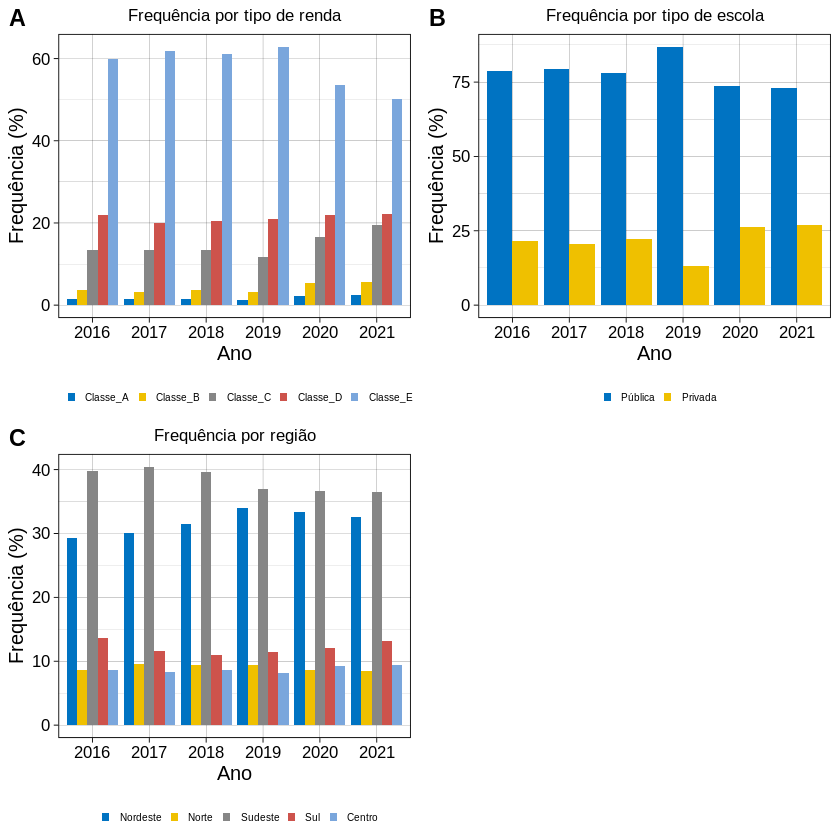

In [ ]:
#PLOTANDO OS GRÁFICOS JUNTOS
ggarrange(freq_renda_1,freq_escola_1,freq_regiao_1,
labels = c("A", "B", "C"), ncol = 2 , nrow = 2)

## 4 CLUSTERIZAÇÃO DOS DADOS

In [ ]:
#3.1 SELECIONANDO AS VARIAVEIS PARA CLUSTERIZAÇÃO

#2016
df_geral_2016 <- filter(df_geral,ano_do_exame == '2016')
df_cluster_2016 <-data.frame(df_geral_2016$NU_NOTA_CH, df_geral_2016$NU_NOTA_CN,
df_geral_2016$NU_NOTA_LC,df_geral_2016$NU_NOTA_MT)

#2017
df_geral_2017 <- filter(df_geral,ano_do_exame == '2017')
df_cluster_2017 <-data.frame(df_geral_2017$NU_NOTA_CH, df_geral_2017$NU_NOTA_CN,
df_geral_2017$NU_NOTA_LC,df_geral_2017$NU_NOTA_MT)

#2018
df_geral_2018 <- filter(df_geral,ano_do_exame == '2018')
df_cluster_2018 <-data.frame(df_geral_2018$NU_NOTA_CH, df_geral_2018$NU_NOTA_CN,
df_geral_2018$NU_NOTA_LC,df_geral_2018$NU_NOTA_MT)

#2019
df_geral_2019 <- filter(df_geral,ano_do_exame == '2019')
df_cluster_2019 <-data.frame(df_geral_2019$NU_NOTA_CH, df_geral_2019$NU_NOTA_CN,
df_geral_2019$NU_NOTA_LC,df_geral_2019$NU_NOTA_MT)

#2020
df_geral_2020 <- filter(df_geral,ano_do_exame == '2020')
df_cluster_2020 <-data.frame(df_geral_2020$NU_NOTA_CH, df_geral_2020$NU_NOTA_CN,
df_geral_2020$NU_NOTA_LC,df_geral_2020$NU_NOTA_MT)

#2021
df_geral_2021 <- filter(df_geral,ano_do_exame == '2021')
df_cluster_2021 <-data.frame(df_geral_2021$NU_NOTA_CH, df_geral_2021$NU_NOTA_CN,
df_geral_2021$NU_NOTA_LC,df_geral_2021$NU_NOTA_MT)


### 4.1MÉTODO ELBOW

In [ ]:
# Dados para o ELBOW
df_cluster_2016_eb <-sample_n(df_cluster_2016,10000)
df_cluster_2017_eb <-sample_n(df_cluster_2017, 10000)
df_cluster_2018_eb <-sample_n(df_cluster_2018, 10000)
df_cluster_2019_eb <-sample_n(df_cluster_2019, 10000)
df_cluster_2020_eb <-sample_n(df_cluster_2020, 10000)
df_cluster_2021_eb <-sample_n(df_cluster_2021,  10000)


In [ ]:
#UTILIZANDO O MÉTODO ELOW PARA ESTABELECER O NÚMERO DE GRUPOS
elbow_2016 <- fviz_nbclust(df_cluster_2016_eb, FUN = kmeans, method = "wss")
elbow_2017 <- fviz_nbclust(df_cluster_2017_eb, FUN = kmeans, method = "wss")
elbow_2018 <- fviz_nbclust(df_cluster_2018_eb, FUN = kmeans, method = "wss")
elbow_2019 <- fviz_nbclust(df_cluster_2019_eb, FUN = kmeans, method = "wss")
elbow_2020 <- fviz_nbclust(df_cluster_2020_eb, FUN = kmeans, method = "wss")
elbow_2021 <- fviz_nbclust(df_cluster_2021_eb, FUN = kmeans, method = "wss")

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


In [ ]:
#ORGANIZANDO BANCO DE DADOS PARA PLOTAGEM

df_eb_2016 <- mutate(elbow_2016$data, ano_do_exame = 2016)
df_eb_2017 <- mutate(elbow_2017$data, ano_do_exame = 2017)
df_eb_2018 <- mutate(elbow_2018$data, ano_do_exame = 2018)
df_eb_2019 <- mutate(elbow_2019$data, ano_do_exame = 2019)
df_eb_2020 <- mutate(elbow_2020$data, ano_do_exame = 2020)
df_eb_2021 <- mutate(elbow_2021$data, ano_do_exame = 2021)

df_eb_geral <- rbind(df_eb_2016,df_eb_2017,df_eb_2018,df_eb_2019,df_eb_2020,df_eb_2021)
df_eb_geral$ano_do_exame  <- as.factor(df_eb_geral$ano_do_exame)
head(df_eb_geral)

,clusters,y,ano_do_exame
,<fct>,<dbl>,<fct>
1,1,282884880,2016
2,2,142595027,2016
3,3,107335503,2016
4,4,90440579,2016
5,5,78908226,2016
6,6,70656397,2016


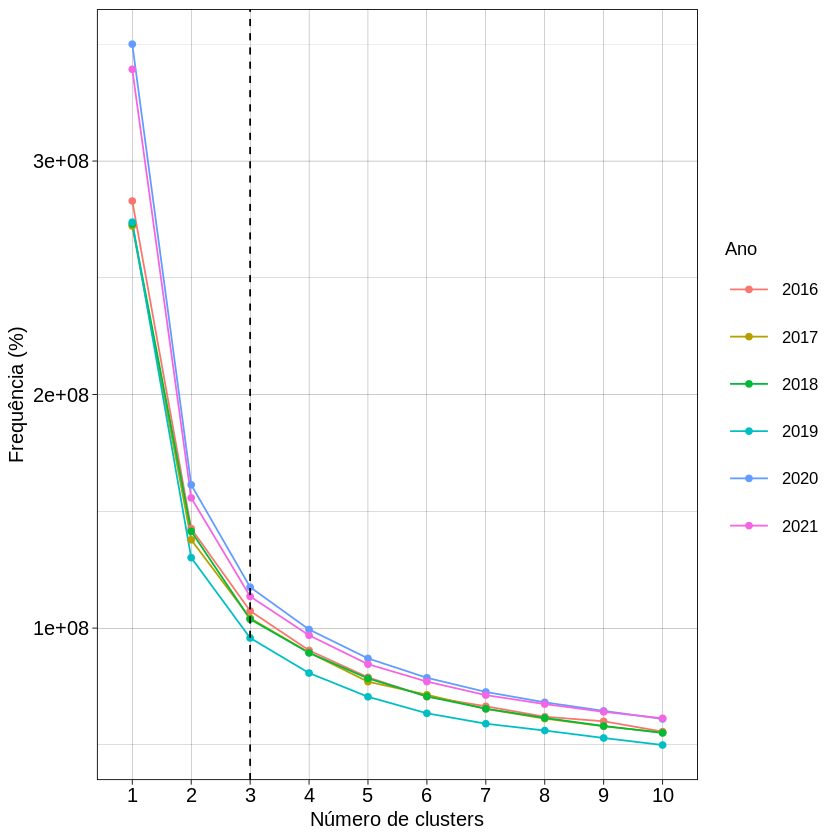

In [ ]:
#PLOAGEN DOS RESULTADOS DO MÉTODO ELBOW
df_eb_geral %>% 
ggplot(aes(x = clusters, y = y , group = ano_do_exame, color = ano_do_exame))+
geom_line()+
geom_point()+
geom_vline(xintercept = 3, linetype = 2)+
theme_linedraw()+
theme( axis.text.x = element_text(size=12), axis.text.y = element_text(size=12),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.text = element_text(size = 10),
legend.key.size = unit(1,'cm'))+
labs( x = 'Número de clusters', y = 'Frequência (%)', color='Ano')


###4.2 K-MEANS

In [ ]:
#ESCALANDO AS VARIÁVEIS SELECIOCNADAS PARA A CLUSTERIZAÇÃO
#PADRONIZANDO OS DADOS

df_cluster_2016 <- scale(df_cluster_2016) 
df_cluster_2017 <-scale(df_cluster_2017) 
df_cluster_2018 <-scale(df_cluster_2018) 
df_cluster_2019 <-scale(df_cluster_2019) 
df_cluster_2020 <-scale(df_cluster_2020) 
df_cluster_2021 <-scale(df_cluster_2021) 

head(df_cluster_2021)

df_geral_2021.NU_NOTA_CH,df_geral_2021.NU_NOTA_CN,df_geral_2021.NU_NOTA_LC,df_geral_2021.NU_NOTA_MT
1.68126116,1.05514063,1.7069970,1.0063040
0.07918971,0.03450097,-0.6654485,0.3234951
-1.25823923,-0.98736837,-1.5932278,-1.0936220
0.91139201,-0.22250347,0.3369195,0.2133932
1.05902317,-0.75618734,0.5214285,0.2950817
0.52098962,1.22360765,0.3683253,-0.6798522


In [ ]:
# FORMAÇÃO DOS CLUSTER UTILIZANDO O K-MEANS
k_2016 <- kmeans(df_cluster_2016, center = 3)
k_2017 <- kmeans(df_cluster_2017, center = 3)
k_2018 <- kmeans(df_cluster_2018, center = 3)
k_2019 <- kmeans(df_cluster_2019, center = 3)
k_2020 <- kmeans(df_cluster_2020, center = 3)
k_2021 <- kmeans(df_cluster_2021, center = 3)

$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

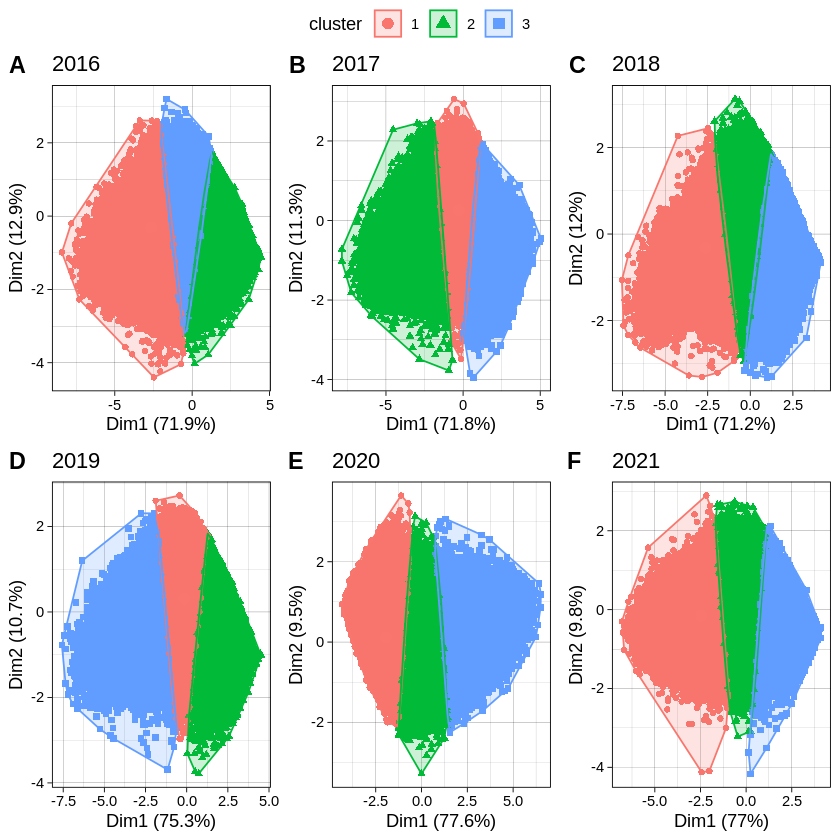

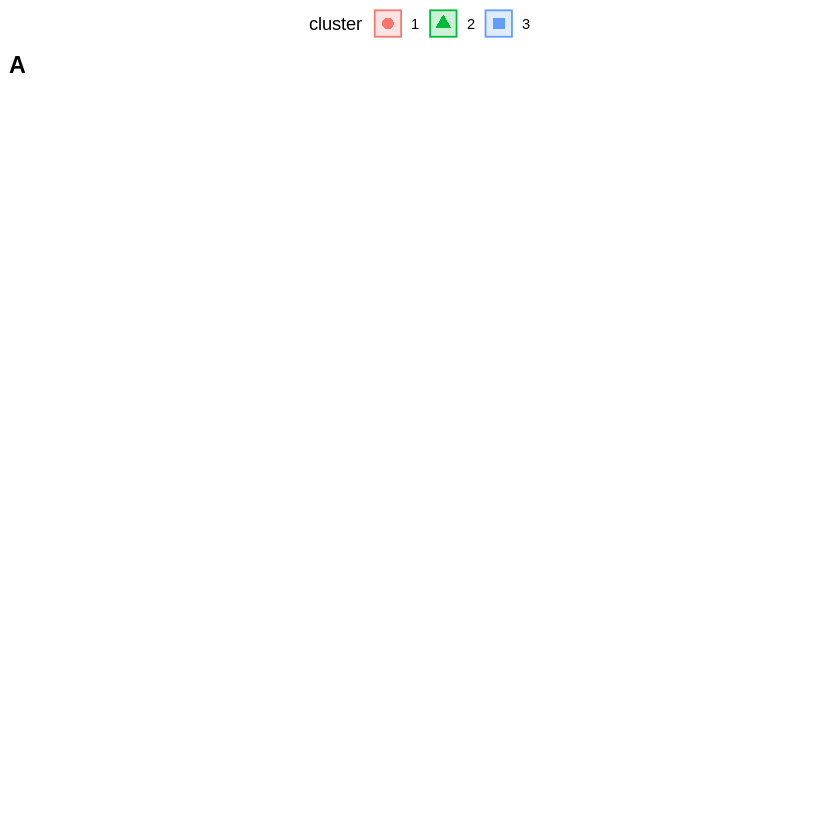

In [ ]:
#Visualizando os resultados da clusterização
a<- fviz_cluster(k_2016, df_cluster_2016, geom = 'point', main = '2016',show.clust.cent = TRUE,ellipse = TRUE,ggtheme = theme_linedraw())
b<- fviz_cluster(k_2017, df_cluster_2017, geom = 'point', main = '2017',show.clust.cent = TRUE,ellipse = TRUE,ggtheme = theme_linedraw())
c<- fviz_cluster(k_2018, df_cluster_2018, geom = 'point', main = '2018',show.clust.cent = TRUE,ellipse = TRUE,ggtheme = theme_linedraw())
d<- fviz_cluster(k_2019, df_cluster_2019, geom = 'point', main = '2019',show.clust.cent = TRUE,ellipse = TRUE,ggtheme = theme_linedraw())
e<- fviz_cluster(k_2020, df_cluster_2020, geom = 'point', main = '2020',show.clust.cent = TRUE,ellipse = TRUE,ggtheme = theme_linedraw())
f<- fviz_cluster(k_2021, df_cluster_2021, geom = 'point', main = '2021',show.clust.cent = TRUE,ellipse = TRUE,ggtheme = theme_linedraw())

ggarrange(a,b,c,d,e,f, labels = c("A", "B", "C",'D','E','F'), ncol = 3 , nrow = 2, common.legend = TRUE, 
legend.position = 'bottom')

In [ ]:
# Transformando resultados dos clusters em um data set
cluster_2016 <- data.frame(k_2016$cluster)
cluster_2017 <- data.frame(k_2017$cluster)
cluster_2018 <- data.frame(k_2018$cluster)
cluster_2019 <- data.frame(k_2019$cluster)
cluster_2020 <- data.frame(k_2020$cluster)
cluster_2021 <- data.frame(k_2021$cluster)

#  Acoplando os clusters no data set 
df_2016_final <- cbind(df_geral_2016,cluster_2016)
df_2017_final <- cbind(df_geral_2017,cluster_2017)
df_2018_final <- cbind(df_geral_2018,cluster_2018)
df_2019_final <- cbind(df_geral_2019,cluster_2019)
df_2020_final <- cbind(df_geral_2020,cluster_2020)
df_2021_final <- cbind(df_geral_2021,cluster_2021)

head(df_2016_final)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,⋯,Q005,Q006,Q022,Q024,Q025,ano_do_exame,classes_renda,regioes,MEDIA,k_2016.cluster
,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>,<int>
1,9,M,3,2,2,0,SE,1,1,1,⋯,6,B,B,A,A,2016,CLASSE_E,NORDESTE,534.02,3
2,2,F,1,2,3,0,CE,1,1,1,⋯,5,E,C,B,B,2016,CLASSE_D,NORDESTE,685.20,2
3,11,F,3,2,2,0,PE,1,1,1,⋯,5,B,C,B,B,2016,CLASSE_E,NORDESTE,649.02,2
4,2,F,3,2,2,0,GO,1,1,1,⋯,4,G,D,B,B,2016,CLASSE_D,CENTRO-OESTE,500.24,3
5,2,F,1,2,3,0,RJ,1,1,1,⋯,3,Q,E,D,B,2016,CLASSE_A,SUDESTE,744.60,2
6,2,F,1,2,3,0,RJ,1,1,1,⋯,4,P,E,E,B,2016,CLASSE_B,SUDESTE,755.66,2


In [ ]:
# REORGANIZANDO E JUNTANDO TODOS OS BANCOS DE DADOS
df_2016_final_1 <- df_2016_final %>%rename(grupo = k_2016.cluster)
df_2017_final_1 <- df_2017_final %>%rename(grupo = k_2017.cluster)
df_2018_final_1 <- df_2018_final %>%rename(grupo = k_2018.cluster)
df_2019_final_1 <- df_2019_final %>%rename(grupo = k_2019.cluster)
df_2020_final_1 <- df_2020_final %>%rename(grupo = k_2020.cluster)
df_2021_final_1 <- df_2021_final %>%rename(grupo = k_2021.cluster)

df_final <- rbind(df_2016_final_1,df_2017_final_1,df_2018_final_1,df_2019_final_1,
df_2020_final_1,df_2021_final_1)


### 4.3 DESCRIÇÃO DOS GRUPOS DE FORMA GERAL

In [ ]:
#ANÁLISE DESCRITIVA GERAL DOS DADOS DO ENEM DA  AO LONGO DOS ANOS

Enem_description_geral <- df_final%>%
 group_by(ano_do_exame, grupo)%>%
 summarise(n = n(), 
 mean_nota_CH = mean(NU_NOTA_CH, na.rm = TRUE),
 mean_nota_CN = mean(NU_NOTA_CN, na.rm= TRUE),
 mean_nota_LC = mean(NU_NOTA_LC,na.rm= TRUE ),
 mean_nota_MT = mean(NU_NOTA_MT, na.rm = TRUE),
 mean_nota_REDACAO = mean(NU_NOTA_REDACAO, na.rm = TRUE),
 mean = (mean_nota_CH + mean_nota_CN + mean_nota_LC + mean_nota_MT+mean_nota_REDACAO )/5,
  count_esc_pub = table(TP_ESCOLA)['2'],
 count_esc_pri = table(TP_ESCOLA)['3'],
 Pública = round((count_esc_pub/n)*100,2),
 Privada = round((count_esc_pri/n)*100,2),
 count_sem_net = table(Q025)['A'],
 count_com_net =table(Q025)['B'],
 Não = round((count_sem_net/n)*100,2),
 Sim = round((count_com_net/n)*100,2),
 count_classe_E = table(classes_renda)['CLASSE_E'],
 count_classe_D = table(classes_renda)['CLASSE_D'],
 count_classe_C = table(classes_renda)['CLASSE_C'],
 count_classe_B = table(classes_renda)['CLASSE_B'],
 count_classe_A = table(classes_renda)['CLASSE_A'],
 count_nordeste = table(regioes)['NORDESTE'],
 count_norte    = table(regioes)['NORTE'],
 count_sudeste = table(regioes)['SUDESTE'],
 count_sul      = table(regioes)['SUL'],
 count_centro   = table(regioes)['CENTRO-OESTE'],
 Classe_E  = round((count_classe_E/ n)*100,2),
 Classe_D  = round((count_classe_D/ n)*100,2),
 Classe_C  = round((count_classe_C/ n)*100,2),
 Classe_B  = round((count_classe_B/ n)*100,2),
 Classe_A  = round((count_classe_A/ n)*100,2),
 Nordeste  = round((count_nordeste/n)*100,2),
 Norte     = round((count_norte/n)*100,2),
 Sudeste  = round((count_sudeste/n)*100,2),
 Sul       = round((count_sul/n)*100,2),
 Centro    = round((count_centro/n)*100,2))%>%
 arrange(desc(mean), .by_group = TRUE)%>%
 mutate(classificação = c('ALTO DESEMPENHO','MÉDIO DESEMPENHO', 'BAIXO DESEMPENHO'))




`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


In [ ]:
## EXPORTANDO OS RESULTADOS EM TABELAS 

install.packages("writexl")
library("writexl")
write_xlsx(Enem_description_geral,"Enem_description_geral.xlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 5 DESCRIÇÃO DOS GRUPOS POR REGIÃO




### 5.1 NORDESTE

In [ ]:
#ANÁLISE DESCRITIVA DOS DADOS DO ENEM DA REGIÃO NORDESTE AO LONGO DOS ANOS

Enem_description_nordeste <- filter(df_final, regioes == 'NORDESTE')%>%
 group_by(ano_do_exame, grupo)%>%
 summarise(n = n(), 
 mean_nota_CH = mean(NU_NOTA_CH, na.rm = TRUE),
 mean_nota_CN = mean(NU_NOTA_CN, na.rm= TRUE),
 mean_nota_LC = mean(NU_NOTA_LC,na.rm= TRUE ),
 mean_nota_MT = mean(NU_NOTA_MT, na.rm = TRUE),
 mean_nota_REDACAO = mean(NU_NOTA_REDACAO, na.rm = TRUE),
 mean = (mean_nota_CH + mean_nota_CN + mean_nota_LC + mean_nota_MT+mean_nota_REDACAO )/5,
  count_esc_pub = table(TP_ESCOLA)['2'],
 count_esc_pri = table(TP_ESCOLA)['3'],
 Pública = round((count_esc_pub/n)*100,2),
 Privada = round((count_esc_pri/n)*100,2),
 count_sem_net = table(Q025)['A'],
 count_com_net =table(Q025)['B'],
 Não = round((count_sem_net/n)*100,2),
 Sim = round((count_com_net/n)*100,2),
 count_classe_E = table(classes_renda)['CLASSE_E'],
 count_classe_D = table(classes_renda)['CLASSE_D'],
 count_classe_C = table(classes_renda)['CLASSE_C'],
 count_classe_B = table(classes_renda)['CLASSE_B'],
 count_classe_A = table(classes_renda)['CLASSE_A'],
 Classe_E  = round((count_classe_E/ n)*100,2),
 Classe_D  = round((count_classe_D/ n)*100,2),
 Classe_C  = round((count_classe_C/ n)*100,2),
 Classe_B  = round((count_classe_B/ n)*100,2),
 Classe_A  = round((count_classe_A/ n)*100,2))%>%
 arrange(desc(mean), .by_group = TRUE)%>%
 mutate(classificação = c('ALTO DESEMPENHO','MÉDIO DESEMPENHO', 'BAIXO DESEMPENHO'))

 

`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


### 5.2 Norte

In [ ]:
#4.2 ANÁLISE DESCRITIVA DOS DADOS DO ENEM DA REGIÃO NORTE AO LONGO DOS ANOS

Enem_description_norte  <- filter(df_final, regioes == 'NORTE')%>%
 group_by(ano_do_exame, grupo)%>%
 summarise(n = n(), 
 mean_nota_CH = mean(NU_NOTA_CH, na.rm = TRUE),
 mean_nota_CN = mean(NU_NOTA_CN, na.rm= TRUE),
 mean_nota_LC = mean(NU_NOTA_LC,na.rm= TRUE ),
 mean_nota_MT = mean(NU_NOTA_MT, na.rm = TRUE),
 mean_nota_REDACAO = mean(NU_NOTA_REDACAO, na.rm = TRUE),
 mean = (mean_nota_CH + mean_nota_CN + mean_nota_LC + mean_nota_MT+mean_nota_REDACAO )/5,
  count_esc_pub = table(TP_ESCOLA)['2'],
 count_esc_pri = table(TP_ESCOLA)['3'],
 Pública = round((count_esc_pub/n)*100,2),
 Privada = round((count_esc_pri/n)*100,2),
 count_sem_net = table(Q025)['A'],
 count_com_net =table(Q025)['B'],
 Não = round((count_sem_net/n)*100,2),
 Sim = round((count_com_net/n)*100,2),
 count_classe_E = table(classes_renda)['CLASSE_E'],
 count_classe_D = table(classes_renda)['CLASSE_D'],
 count_classe_C = table(classes_renda)['CLASSE_C'],
 count_classe_B = table(classes_renda)['CLASSE_B'],
 count_classe_A = table(classes_renda)['CLASSE_A'],
 Classe_E  = round((count_classe_E/ n)*100,2),
 Classe_D  = round((count_classe_D/ n)*100,2),
 Classe_C  = round((count_classe_C/ n)*100,2),
 Classe_B  = round((count_classe_B/ n)*100,2),
 Classe_A  = round((count_classe_A/ n)*100,2))%>%
 arrange(desc(mean), .by_group = TRUE)%>%
 mutate(classificação = c('ALTO DESEMPENHO','MÉDIO DESEMPENHO', 'BAIXO DESEMPENHO'))



`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


### 5.3 Sudeste

In [ ]:
#4.3 ANÁLISE DESCRITIVA DOS DADOS DO ENEM DA REGIÃO NORDESTE AO LONGO DOS ANOS

Enem_description_sudeste <- filter(df_final, regioes == 'SUDESTE')%>%
 group_by(ano_do_exame, grupo)%>%
 summarise(n = n(), 
 mean_nota_CH = mean(NU_NOTA_CH, na.rm = TRUE),
 mean_nota_CN = mean(NU_NOTA_CN, na.rm= TRUE),
 mean_nota_LC = mean(NU_NOTA_LC,na.rm= TRUE ),
 mean_nota_MT = mean(NU_NOTA_MT, na.rm = TRUE),
 mean_nota_REDACAO = mean(NU_NOTA_REDACAO, na.rm = TRUE),
 mean = (mean_nota_CH + mean_nota_CN + mean_nota_LC + mean_nota_MT+mean_nota_REDACAO )/5,
  count_esc_pub = table(TP_ESCOLA)['2'],
 count_esc_pri = table(TP_ESCOLA)['3'],
 Pública = round((count_esc_pub/n)*100,2),
 Privada = round((count_esc_pri/n)*100,2),
 count_sem_net = table(Q025)['A'],
 count_com_net =table(Q025)['B'],
 Não = round((count_sem_net/n)*100,2),
 Sim = round((count_com_net/n)*100,2),
 count_classe_E = table(classes_renda)['CLASSE_E'],
 count_classe_D = table(classes_renda)['CLASSE_D'],
 count_classe_C = table(classes_renda)['CLASSE_C'],
 count_classe_B = table(classes_renda)['CLASSE_B'],
 count_classe_A = table(classes_renda)['CLASSE_A'],
 Classe_E  = round((count_classe_E/ n)*100,2),
 Classe_D  = round((count_classe_D/ n)*100,2),
 Classe_C  = round((count_classe_C/ n)*100,2),
 Classe_B  = round((count_classe_B/ n)*100,2),
 Classe_A  = round((count_classe_A/ n)*100,2))%>%
 arrange(desc(mean), .by_group = TRUE)%>%
 mutate(classificação = c('ALTO DESEMPENHO','MÉDIO DESEMPENHO', 'BAIXO DESEMPENHO'))



`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


### 5.4 Sul

In [ ]:
#4.4 ANÁLISE DESCRITIVA DOS DADOS DO ENEM DA REGIÃO NORDESTE AO LONGO DOS ANOS

Enem_description_sul <- filter(df_final, regioes == 'SUL')%>%
 group_by(ano_do_exame, grupo)%>%
  summarise(n = n(), 
 mean_nota_CH = mean(NU_NOTA_CH, na.rm = TRUE),
 mean_nota_CN = mean(NU_NOTA_CN, na.rm= TRUE),
 mean_nota_LC = mean(NU_NOTA_LC,na.rm= TRUE ),
 mean_nota_MT = mean(NU_NOTA_MT, na.rm = TRUE),
 mean_nota_REDACAO = mean(NU_NOTA_REDACAO, na.rm = TRUE),
 mean = (mean_nota_CH + mean_nota_CN + mean_nota_LC + mean_nota_MT+mean_nota_REDACAO )/5,
  count_esc_pub = table(TP_ESCOLA)['2'],
 count_esc_pri = table(TP_ESCOLA)['3'],
 Pública = round((count_esc_pub/n)*100,2),
 Privada = round((count_esc_pri/n)*100,2),
 count_sem_net = table(Q025)['A'],
 count_com_net =table(Q025)['B'],
 Não = round((count_sem_net/n)*100,2),
 Sim = round((count_com_net/n)*100,2),
 count_classe_E = table(classes_renda)['CLASSE_E'],
 count_classe_D = table(classes_renda)['CLASSE_D'],
 count_classe_C = table(classes_renda)['CLASSE_C'],
 count_classe_B = table(classes_renda)['CLASSE_B'],
 count_classe_A = table(classes_renda)['CLASSE_A'],
 Classe_E  = round((count_classe_E/ n)*100,2),
 Classe_D  = round((count_classe_D/ n)*100,2),
 Classe_C  = round((count_classe_C/ n)*100,2),
 Classe_B  = round((count_classe_B/ n)*100,2),
 Classe_A  = round((count_classe_A/ n)*100,2))%>%
 arrange(desc(mean), .by_group = TRUE)%>%
 mutate(classificação = c('ALTO DESEMPENHO','MÉDIO DESEMPENHO', 'BAIXO DESEMPENHO'))


`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


### 5.5 Centro Oeste

In [ ]:
#4.5 ANÁLISE DESCRITIVA DOS DADOS DO ENEM DA REGIÃO NORDESTE AO LONGO DOS ANOS

Enem_description_centro <- filter(df_final, regioes == 'CENTRO-OESTE')%>%
 group_by(ano_do_exame, grupo)%>%
  summarise(n = n(), 
 mean_nota_CH = mean(NU_NOTA_CH, na.rm = TRUE),
 mean_nota_CN = mean(NU_NOTA_CN, na.rm= TRUE),
 mean_nota_LC = mean(NU_NOTA_LC,na.rm= TRUE ),
 mean_nota_MT = mean(NU_NOTA_MT, na.rm = TRUE),
 mean_nota_REDACAO = mean(NU_NOTA_REDACAO, na.rm = TRUE),
 mean = (mean_nota_CH + mean_nota_CN + mean_nota_LC + mean_nota_MT+mean_nota_REDACAO )/5,
  count_esc_pub = table(TP_ESCOLA)['2'],
 count_esc_pri = table(TP_ESCOLA)['3'],
 Pública = round((count_esc_pub/n)*100,2),
 Privada = round((count_esc_pri/n)*100,2),
 count_sem_net = table(Q025)['A'],
 count_com_net =table(Q025)['B'],
 Não = round((count_sem_net/n)*100,2),
 Sim = round((count_com_net/n)*100,2),
 count_classe_E = table(classes_renda)['CLASSE_E'],
 count_classe_D = table(classes_renda)['CLASSE_D'],
 count_classe_C = table(classes_renda)['CLASSE_C'],
 count_classe_B = table(classes_renda)['CLASSE_B'],
 count_classe_A = table(classes_renda)['CLASSE_A'],
 Classe_E  = round((count_classe_E/ n)*100,2),
 Classe_D  = round((count_classe_D/ n)*100,2),
 Classe_C  = round((count_classe_C/ n)*100,2),
 Classe_B  = round((count_classe_B/ n)*100,2),
 Classe_A  = round((count_classe_A/ n)*100,2))%>%
 arrange(desc(mean), .by_group = TRUE)%>%
 mutate(classificação = c('ALTO DESEMPENHO','MÉDIO DESEMPENHO', 'BAIXO DESEMPENHO'))



`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


## 6 GRAFICOS DAS NOTAS PARA CADA GRUPO DE DESEMEPNHO

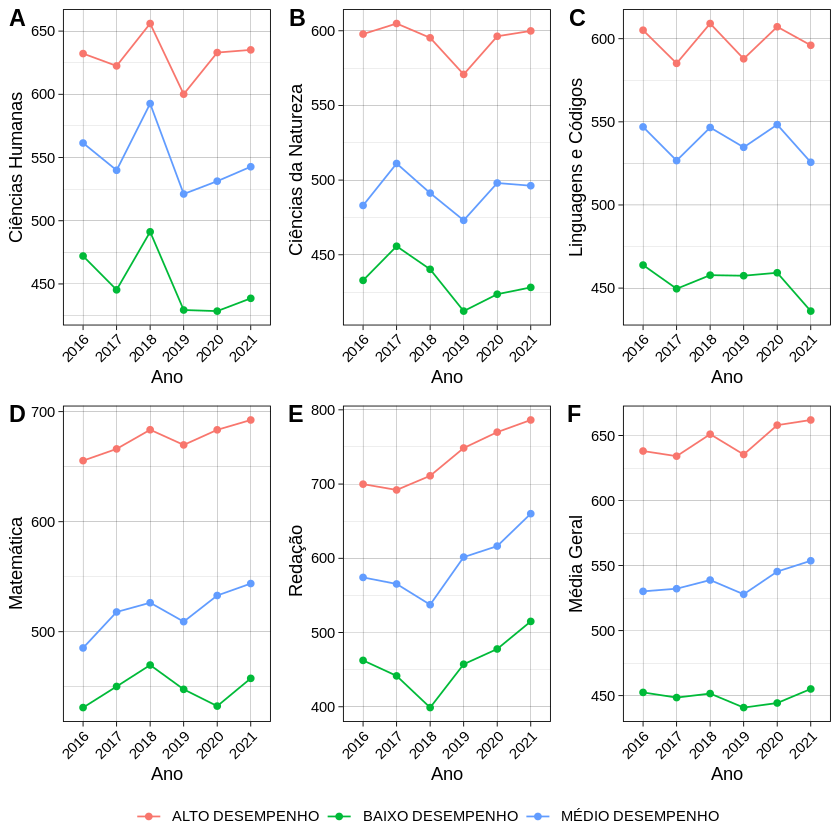

In [ ]:
 # PLOTAGEM DOS GRÁFICOS POR GRUPOS DE DESEMPENHO 

#CIÊNCIAS HUMANAS
(Enem_description_geral)%>% 
ggplot(aes(x = ano_do_exame, y = mean_nota_CH, 
group = classificação, colour = classificação))+
geom_line()+
geom_point()+
labs(y = 'Ciências Humanas', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank()) -> graph_CH


#CIENCIAS DA NATUREZA
(Enem_description_geral)%>% 
ggplot(aes(x = ano_do_exame, y = mean_nota_CN, 
group = classificação, colour = classificação))+
geom_line()+
geom_point()+
labs(y = 'Ciências da Natureza ', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> graph_CN

#LINGUAGENS E CODIGOS
(Enem_description_geral)%>% 
ggplot(aes(x = ano_do_exame, y = mean_nota_LC, group = classificação, colour = classificação))+
geom_line()+
geom_point()+
labs(y = 'Linguagens e Códigos', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank()) -> graph_LC

#MATEMÁTICA
(Enem_description_geral)%>%  
ggplot(aes(x = ano_do_exame, y = mean_nota_MT, group = classificação, colour = classificação))+
geom_line()+
geom_point()+
labs(y = 'Matemática', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> graph_MT

#REDAÇÃO
(Enem_description_geral)%>% 
ggplot(aes(x = ano_do_exame, y = mean_nota_REDACAO, 
group = classificação, colour = classificação))+
geom_line()+
geom_point()+
labs(y = ' Redação', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> graph_REDACAO

#Media geral
(Enem_description_geral)%>% 
ggplot(aes(x= ano_do_exame , y = mean, group = classificação, colour = classificação))+
geom_line()+
geom_point() +
labs(y = 'Média Geral', x = 'Ano')+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
theme(legend.title=element_blank())-> graph_MD

ggarrange(graph_CH,graph_CN, graph_LC,graph_MT, graph_REDACAO,graph_MD,
labels = c("A", "B", "C",'D','E','F'), ncol = 3 , nrow = 2,common.legend = TRUE, legend = "bottom")



## 7 GRÁFICO DA DISTRIBUIÇÃO DA PROPORÇÃO DE ESTUDANTES PARA CADA REGIÃO

In [ ]:
#ORGANIZANDO OS DADOS PARA PLOTAGEM

Enem_description_nordeste <- mutate(Enem_description_nordeste, região = 'NORDESTE')
Enem_description_norte <- mutate(Enem_description_norte, região = 'NORTE')
Enem_description_sudeste <- mutate(Enem_description_sudeste, região = 'SUDESTE')
Enem_description_sul <- mutate(Enem_description_sul,região = 'SUL')
Enem_description_centro <- mutate(Enem_description_centro, região = 'CENTRO')

#Encontrar onde esse objeto foi utilizado
#Enem_description_brasil <- rbind(Enem_description_nordeste,Enem_description_norte,Enem_description_sudeste,
#Enem_description_sul,Enem_description_centro)



In [ ]:
# JUNTANDO OS BANCOS DE DADOS 

#NORDESTE

Enem_description_nordeste%>%
group_by (ano_do_exame) %>%
summarise(freq_total = (n/sum(n))*100,ano_do_exame = ano_do_exame, 
region = 'NORDESTE', classification = classificação) -> freq_total_nordeste

#NORTE
Enem_description_norte%>%
group_by (ano_do_exame) %>%
summarise(freq_total = (n/sum(n))*100,,ano_do_exame = ano_do_exame, 
region = 'NORTE',classification = classificação) -> freq_total_norte

#SUDESTE
Enem_description_sudeste%>%
group_by (ano_do_exame) %>%
summarise(freq_total = (n/sum(n))*100,,ano_do_exame = ano_do_exame, 
region = 'SUDESTE',classification = classificação) -> freq_total_sudeste

#SUL
Enem_description_sul%>%
group_by (ano_do_exame) %>%
summarise(freq_total = (n/sum(n))*100,,ano_do_exame = ano_do_exame, 
region = 'SUL',classification = classificação) -> freq_total_sul

#CENTRO-OESTE
Enem_description_centro%>%
group_by (ano_do_exame) %>%
summarise(freq_total = (n/sum(n))*100,,ano_do_exame = ano_do_exame, 
region = 'CENTRO-OESTE',classification = classificação) -> freq_total_centro


freq_total_geral <-rbind(freq_total_nordeste,freq_total_norte,freq_total_sudeste,freq_total_sul,freq_total_centro)


`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


In [ ]:
install.packages ("writexl")
library("writexl")
write_xlsx(freq_total_geral,"freq_total_geral.xlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

#DISTRIBUIÇÃO DA PROPORÇAO DE ALUNOS NOS GRUPOS DE ALTO, MÉDIO E BAIXO DESEMPENHO

#Esse gráfico nos permite visualizar  a proporção e alunos em cada grupo ao longo 
# dos anos, com isso poderemos ver se essa proporção aumentou ou diminuiu com a pandemia. 

#ALTO DESEMEPENHO
filter(freq_total_geral, classification == 'ALTO DESEMPENHO') %>% 
ggplot(aes(x = ano_do_exame, y = freq_total, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Alto Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_regiao_alto


#MÉDIO DESEMPENHO
filter(freq_total_geral, classification == 'MÉDIO DESEMPENHO') %>% 
ggplot(aes(x = ano_do_exame, y = freq_total, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Médio Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_regiao_medio

#BAIXO DESEMPENHO
filter(freq_total_geral, classification == 'BAIXO DESEMPENHO') %>% 
ggplot( aes(x = ano_do_exame, y = freq_total, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Baixo Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_regiao_baixo
         
        

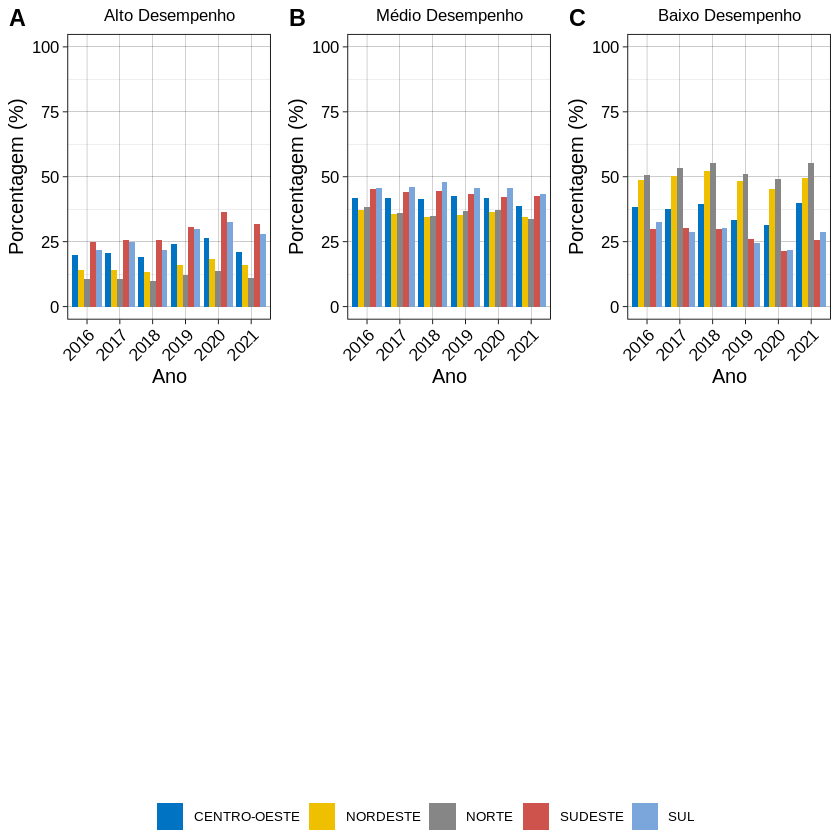

In [ ]:
#PLOTANDO OS GRAFICOS JUNTOS
ggarrange(prop_regiao_alto,prop_regiao_medio,prop_regiao_baixo, 
labels = c("A", "B", "C","A", "B", "C"),ncol = 3, nrow = 2, common.legend = TRUE, legend = "bottom")


## 8 GRAFICO DA DISTRIBUIÇÃO DE ESTUDANTES POR TIPO DE ESCOLA EM CADA GRUPO DE DESEMPENHO

### 8.1 ESCOLA PUBLICA

In [ ]:
##ORGANIZANDO OS DADOS PARA PLOTAGEM

## DISTRIBUIÇÃO DOS ALUNOS DE ESCOLA PÚBLICA EM CADA GRUPO DE DESEMEPENHO

Enem_description_nordeste%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'NORDESTE',
dist_esc_pub = (count_esc_pub/sum(count_esc_pub ))*100,
classification = classificação ) ->dist_graph_esc_pub_nordeste

## DISTRIBUIÇÃO DOS ALUNOS DE ESCOLA PÚBLICA EM CADA GRUPO DE DESEMEPENHO

Enem_description_norte%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'NORTE',
dist_esc_pub = (count_esc_pub/sum(count_esc_pub ))*100,
classification = classificação )->dist_graph_esc_pub_norte

## DISTRIBUIÇÃO DOS ALUNOS DE ESCOLA PÚBLICA EM CADA GRUPO DE DESEMEPENHO

Enem_description_sudeste%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'SUDESTE',
dist_esc_pub = (count_esc_pub/sum(count_esc_pub ))*100,
classification = classificação )->dist_graph_esc_pub_sudeste

## DISTRIBUIÇÃO DOS ALUNOS DE ESCOLA PÚBLICA EM CADA GRUPO DE DESEMEPENHO

Enem_description_sul%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'SUL',
dist_esc_pub = (count_esc_pub/sum(count_esc_pub ))*100,
classification = classificação )->dist_graph_esc_pub_sul

## DISTRIBUIÇÃO DOS ALUNOS DE ESCOLA PÚBLICA EM CADA GRUPO DE DESEMEPENHO

Enem_description_centro%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'CENTRO',
dist_esc_pub = (count_esc_pub/sum(count_esc_pub ))*100,
classification = classificação )->dist_graph_esc_pub_centro

dist_geral_esc_pub <- rbind(dist_graph_esc_pub_nordeste,dist_graph_esc_pub_norte,dist_graph_esc_pub_sudeste,
dist_graph_esc_pub_sul,dist_graph_esc_pub_centro)

`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


In [ ]:
#EXPORTANDO O BANCO DE DADOS DAS PORCENTAGENS DE ESTUDANTES DE ESCOLAS PÚBLICAS
write_xlsx(dist_geral_esc_pub,"dist_geral_esc_pub.xlsx")

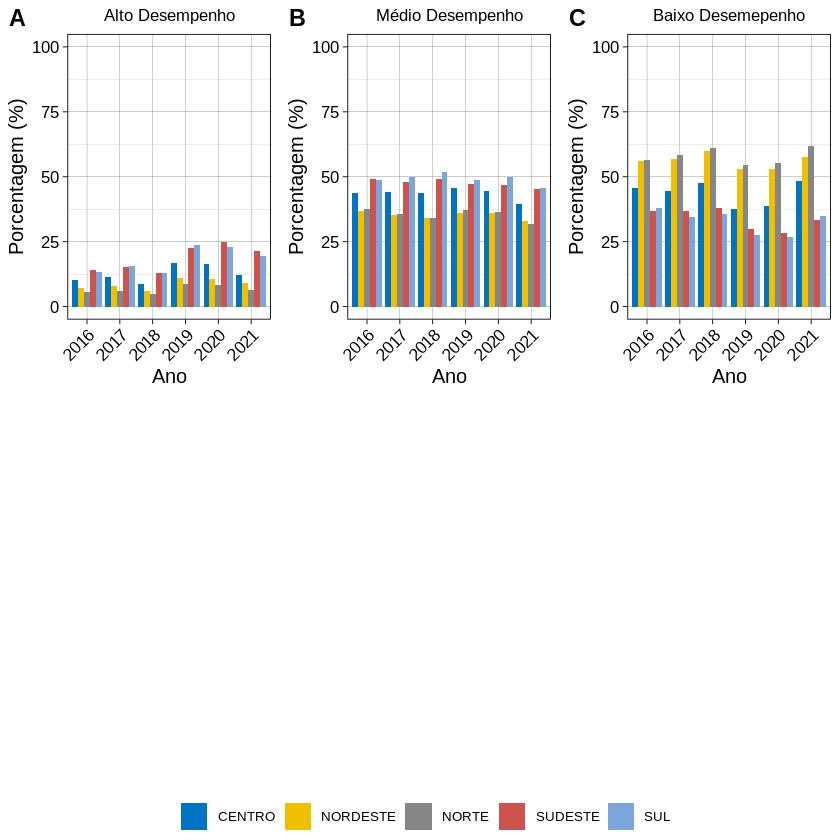

In [ ]:

#DISTRIBUIÇÃO DA PROPORÇAO DE ALUNOS NOS GRUPOS DE ALTO, MÉDIO E BAIXO DESEMPENHO - ESCOLA PÚBLICA

#Esse gráfico nos permite visualizar os a proporção e alunos de escola pública em cada grupo ao longo 
# dos anos, com isso poderemos ver se essa proporção aumentou ou diminuiu com a pandemia. 

#ALTO DESEMPENHO
filter(dist_geral_esc_pub, classification =='ALTO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = dist_esc_pub, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Alto Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_esc_pub_alto

#MÉDIO DESEMPENHO
filter(dist_geral_esc_pub, classification =='MÉDIO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = dist_esc_pub, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Médio Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_esc_pub_medio

#BAIXO DESEMPENHO
filter(dist_geral_esc_pub, classification =='BAIXO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = dist_esc_pub, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Baixo Desemepenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_esc_pub_baixo

ggarrange(prop_esc_pub_alto,prop_esc_pub_medio,prop_esc_pub_baixo, 
labels = c("A", "B", "C","A", "B", "C"),ncol = 3, nrow = 2, common.legend = TRUE, legend = "bottom")

         

### 8.2 ESCOLA PRIVADA

In [ ]:
##ORGANIZANDO OS DADOS PARA PLOTAGEM

## DISTRIBUIÇÃO DOS ALUNOS DE ESCOLA PÚBLICA EM CADA GRUPO DE DESEMEPENHO

#NORDESTE

Enem_description_nordeste%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'NORDESTE',
dist_esc_pri = (count_esc_pri/sum(count_esc_pri ))*100,classification = classificação ) ->dist_graph_esc_pri_nordeste

## NORTE

Enem_description_norte%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'NORTE',
dist_esc_pri = (count_esc_pri/sum(count_esc_pri ))*100,classification = classificação )->dist_graph_esc_pri_norte

## SUDESTE

Enem_description_sudeste%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'SUDESTE',
dist_esc_pri = (count_esc_pri/sum(count_esc_pri ))*100,classification = classificação )->dist_graph_esc_pri_sudeste

## SUL

Enem_description_sul%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'SUL',
dist_esc_pri = (count_esc_pri/sum(count_esc_pri ))*100,classification = classificação )->dist_graph_esc_pri_sul

## CENTRO-OESTE

Enem_description_centro%>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame, region = 'CENTRO',
dist_esc_pri = (count_esc_pri/sum(count_esc_pri ))*100,classification = classificação )->dist_graph_esc_pri_centro

dist_geral_esc_pri <- rbind(dist_graph_esc_pri_nordeste,dist_graph_esc_pri_norte,dist_graph_esc_pri_sudeste,
dist_graph_esc_pri_sul,dist_graph_esc_pri_centro)

`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.


In [ ]:
write_xlsx(dist_geral_esc_pri,"PorcentagemDasEscolasPrivadas.xlsx")

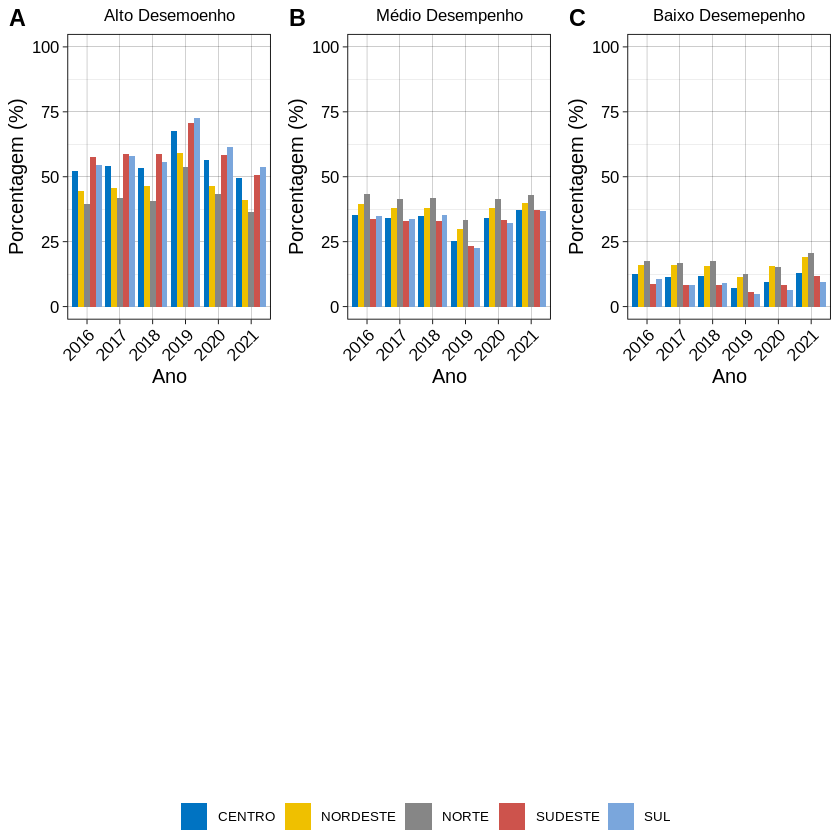

In [ ]:
#DISTRIBUIÇÃO DA PROPORÇAO DE ALUNOS NOS GRUPOS DE ALTO, MÉDIO E BAIXO DESEMPENHO - ESCOLA PÚBLICA

#Esse gráfico nos permite visualizar os a proporção e alunos de escola pública em cada grupo ao longo 
# dos anos, com isso poderemos ver se essa proporção aumentou ou diminuiu com a pandemia. 

filter(dist_geral_esc_pri, classification =='ALTO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = dist_esc_pri, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Alto Desemoenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_esc_pri_alto

#MÉDIO DESEMPENHO
filter(dist_geral_esc_pri, classification =='MÉDIO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = dist_esc_pri, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Médio Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_esc_pri_medio

#BAIXO DESEMPENHO
filter(dist_geral_esc_pri, classification =='BAIXO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = dist_esc_pri, group = region, fill = region ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Baixo Desemepenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_esc_pri_baixo

ggarrange(prop_esc_pri_alto,prop_esc_pri_medio,prop_esc_pri_baixo, 
labels = c("A", "B", "C","A", "B", "C"),ncol = 3, nrow = 2, common.legend = TRUE, legend = "bottom")

### 8.3 ANALISANDO AS DUAS ESCOLAS JUNTAS

In [ ]:
dist_geral_esc_pri_1 <- dist_geral_esc_pri %>%mutate(TP_ESCOLA = 'PRIVADA')%>%
rename(dist_escola = dist_esc_pri)
dist_geral_esc_pub_1 <- dist_geral_esc_pub %>%mutate(TP_ESCOLA = 'PUBLICA')%>%
rename(dist_escola = dist_esc_pub)

dist_geral_escola_df <- rbind(dist_geral_esc_pri_1,dist_geral_esc_pub_1)


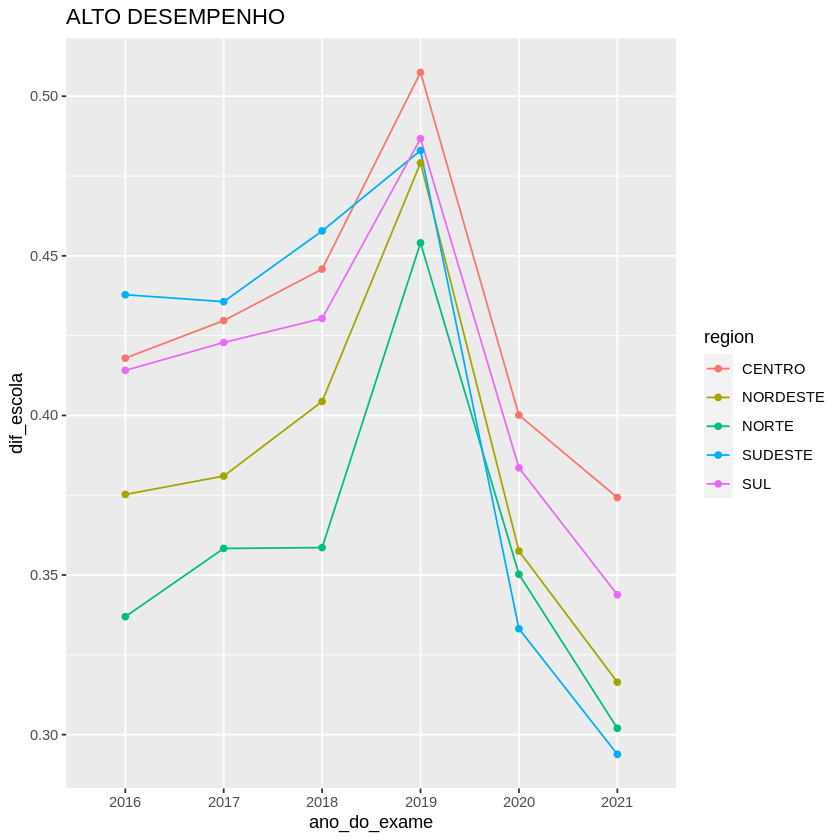

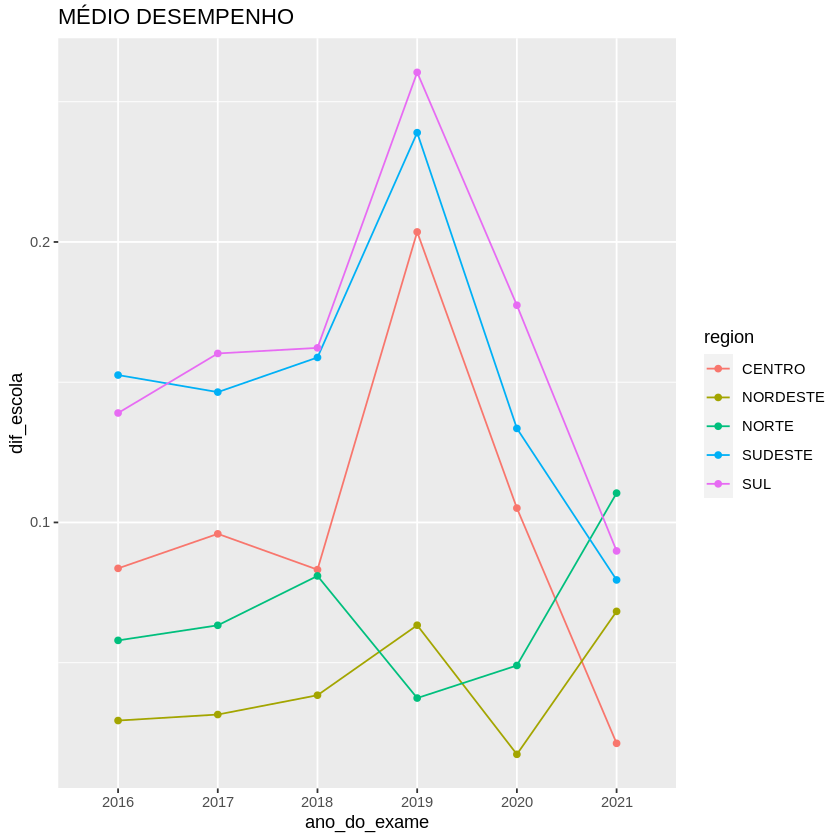

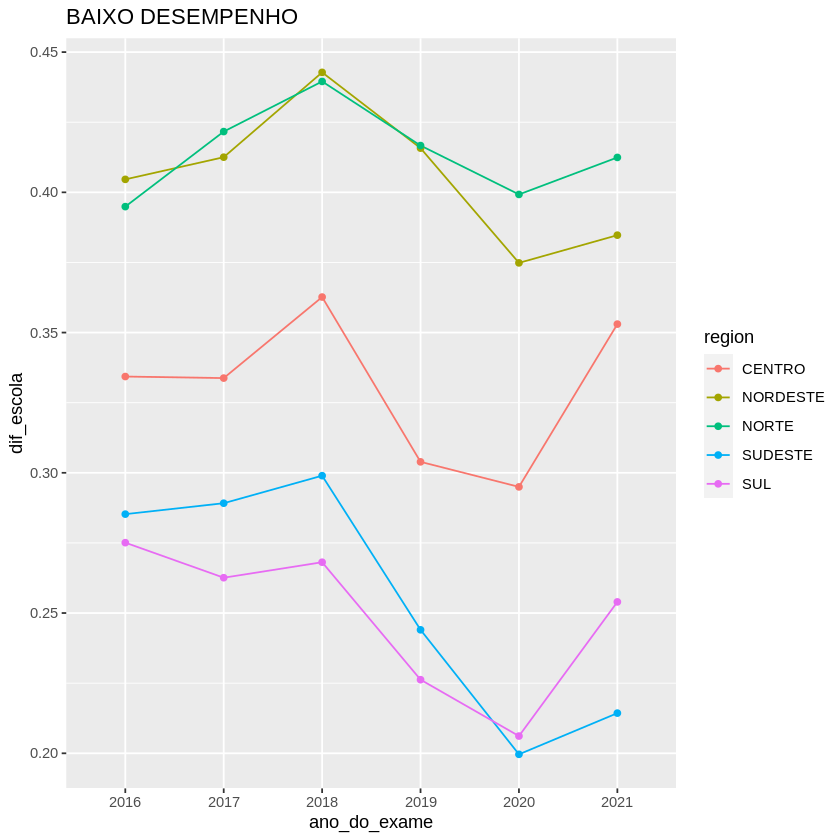

In [ ]:


dist_geral_merged <- merge(dist_geral_esc_pri,dist_geral_esc_pub)

dist_geral_merged <- mutate(dist_geral_merged , dif_escola = abs(dist_esc_pri - dist_esc_pub))

#ALTO DESEMPENHO
filter(dist_geral_merged, classification =='ALTO DESEMPENHO')%>% 
ggplot(aes(x = ano_do_exame, y = dif_escola, group = region , colour = region ))+
geom_line()+'
geom_point()+
ggtitle('ALTO DESEMPENHO')

#MEDIO DESEMPENHO
filter(dist_geral_merged, classification =='MÉDIO DESEMPENHO')%>% 
ggplot(aes(x = ano_do_exame, y = dif_escola, group = region , colour = region ))+
geom_line()+
geom_point()+
ggtitle('MÉDIO DESEMPENHO')

#BAIXO DESEMEPENHO
filter(dist_geral_merged, classification =='BAIXO DESEMPENHO')%>% 
ggplot(aes(x = ano_do_exame, y = dif_escola, group = region , colour = region ))+
geom_line()+
geom_point()+
ggtitle('BAIXO DESEMPENHO')

## 9 GRÁFICO DA DISTRIBUIÇÃO DA PROPORÇÃO DE ESTUDANTES POR CLASSES

In [ ]:
##ORGANIZANDO OS DADOS PARA PLOTAGEM

## DISTRIBUIÇÃO DOS ALUNOS DE ESCOLA PÚBLICA EM CADA GRUPO DE DESEMEPENHO

Enem_description_geral %>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame,
Classe_A = (count_classe_A/sum(count_classe_A ))*100,
Classe_B = (count_classe_B/sum(count_classe_B ))*100,
Classe_C = (count_classe_C/sum(count_classe_C ))*100,
Classe_D = (count_classe_D/sum(count_classe_D ))*100,
Classe_E = (count_classe_E/sum(count_classe_E ))*100,
classification = classificação)-> prop_classes

write_xlsx(prop_classes,"PorcentagensDasClasses.xlsx")

prop_classes <- melt(prop_classes, id = c('ano_do_exame','classification'))

`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
Warning message:
“attributes are not identical across measure variables; they will be dropped”


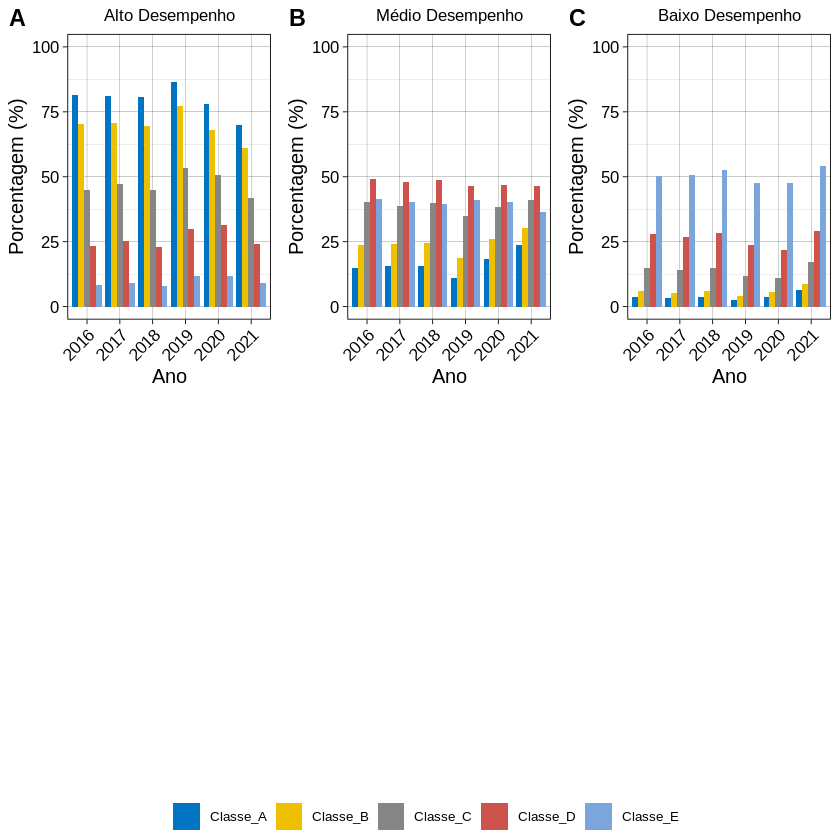

In [ ]:

#DISTRIBUIÇÃO DA PROPORÇAO DE ALUNOS NOS GRUPOS DE ALTO, MÉDIO E BAIXO DESEMPENHO - ESCOLA PÚBLICA

#Esse gráfico nos permite visualizar os a proporção e alunos de escola pública em cada grupo ao longo 
# dos anos, com isso poderemos ver se essa proporção aumentou ou diminuiu com a pandemia. 

#ALTO DESEMPENHO
filter(prop_classes, classification =='ALTO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Alto Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_classes_alto


#MÉDIO DESEMPENHO
filter(prop_classes, classification =='MÉDIO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Médio Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_classes_medio


#BAIXO DESEMPENHO
filter(prop_classes, classification =='BAIXO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Baixo Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_classes_baixo


ggarrange(prop_classes_alto,prop_classes_medio,prop_classes_baixo,
labels = c("A", "B", "C"),ncol = 3, nrow = 2, common.legend = TRUE, legend = "bottom")

In [ ]:
prop_renda_baixo

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'variable' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(prin

## 10 GRÁFICO DA DISTRIBUIÇÃO DE PROPORÇÃO DE ESTUDANTES POR ACESSO A INTERNET

In [ ]:
##ORGANIZANDO OS DADOS PARA PLOTAGEM

## DISTRIBUIÇÃO DOS ALUNOS DE ESCOLA PÚBLICA EM CADA GRUPO DE DESEMEPENHO

Enem_description_geral %>% group_by (ano_do_exame)%>%
summarise( ano_do_exame = ano_do_exame,
Não = (count_sem_net/sum(count_sem_net))*100,
Sim=  (count_com_net/sum(count_com_net ))*100,
classification = classificação)-> prop_net

prop_net <- melt(prop_net, id = c('ano_do_exame','classification'))

`summarise()` has grouped output by 'ano_do_exame'. You can override using the
`.groups` argument.
Warning message:
“attributes are not identical across measure variables; they will be dropped”


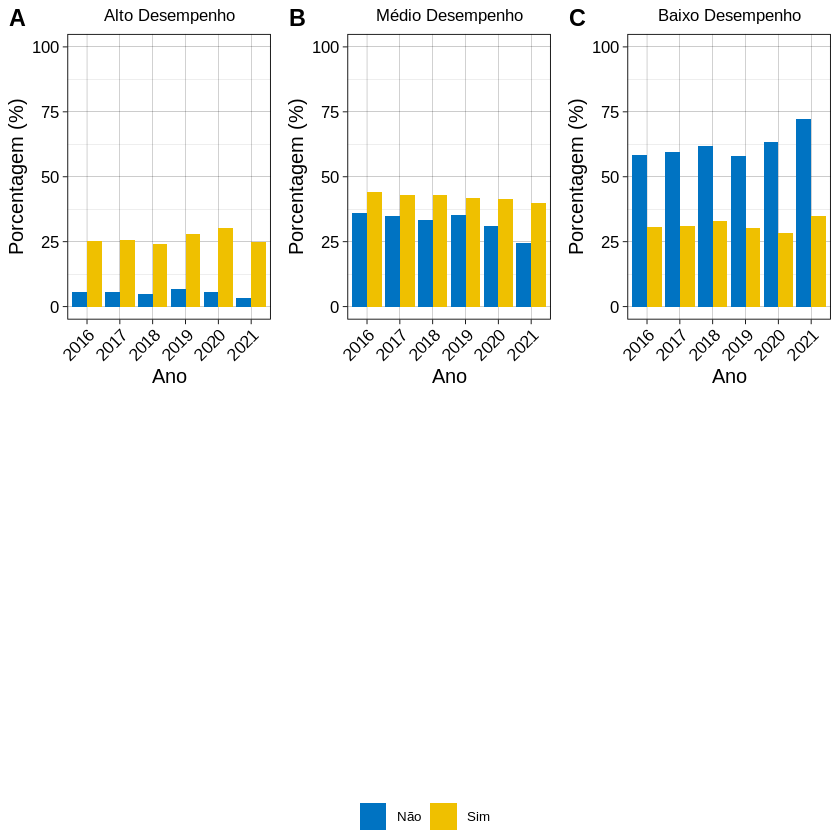

In [ ]:
#DISTRIBUIÇÃO DA PROPORÇAO DE ALUNOS NOS GRUPOS DE ALTO, MÉDIO E BAIXO DESEMPENHO - ESCOLA PÚBLICA

#Esse gráfico nos permite visualizar os a proporção e alunos de escola pública em cada grupo ao longo 
# dos anos, com isso poderemos ver se essa proporção aumentou ou diminuiu com a pandemia. 

#ALTO DESEMPENHO
filter(prop_net, classification =='ALTO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Alto Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_net_alto


#MÉDIO DESEMPENHO
filter(prop_net, classification =='MÉDIO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Médio Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_net_medio


#BAIXO DESEMPENHO
filter(prop_net, classification =='BAIXO DESEMPENHO')%>%
ggplot(aes(x = ano_do_exame, y = value, group = variable, fill = variable ))+
geom_col(position = 'dodge', show.legend = TRUE)+
ggtitle('Baixo Desempenho')+
ylim(c(0,100))+
scale_x_discrete(guide = guide_axis(angle = 45))+
theme_linedraw()+
scale_fill_jco()+
theme( plot.title=element_text( hjust=0.5, size = 10), 
axis.text.x=element_text(size=10),axis.text.y =element_text(size=10),
axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12),
legend.title = element_blank(), legend.text = element_text(size = 8))+
labs( x = 'Ano', y = 'Porcentagem (%)') -> prop_net_baixo


ggarrange(prop_net_alto,prop_net_medio,prop_net_baixo,
labels = c("A", "B", "C"),ncol = 3, nrow = 2, common.legend = TRUE, legend = "bottom")